In [1]:
# Standard imports
import numpy as np
import pandas as pd

# My imports
import wrangle as w

# Viz imports
import matplotlib.pyplot as plt

# Stats
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = w.get_zillow_data()
df

csv file found and loaded


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,tax_rate
4,4.0,2.0,3633.0,296425.0,2005,6941.39,6037.0,0.02
6,3.0,4.0,1620.0,847770.0,2011,10244.94,6037.0,0.01
7,3.0,2.0,2077.0,646760.0,1926,7924.68,6037.0,0.01
11,0.0,0.0,1200.0,5328.0,1972,91.60,6037.0,0.02
14,0.0,0.0,171.0,6920.0,1973,255.17,6037.0,0.04
...,...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015,13877.56,6037.0,0.03
2152858,4.0,3.0,2262.0,960756.0,2015,13494.52,6059.0,0.01
2152859,4.0,4.5,3127.0,536061.0,2014,6244.16,6059.0,0.01
2152861,3.0,2.5,1974.0,424353.0,2015,5302.70,6059.0,0.01


In [10]:
stats.skewnorm(7).rvs(1500) * 10 + 100

array([103.66302157, 113.46932111, 103.19319036, ..., 104.03969264,
       105.54476963, 113.18796447])

Here is a histogram of the dataset we will be working with.


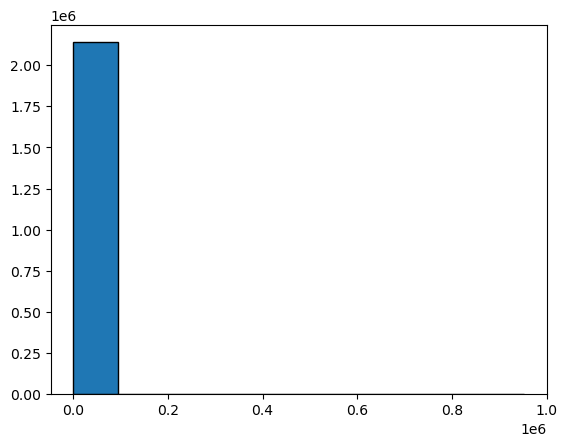

In [15]:
np.random.seed(123)

x = df.calculatedfinishedsquarefeet

plt.hist(x, bins=10,ec='black')
print('Here is a histogram of the dataset we will be working with.')

In [6]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

Text(0.5, 1.0, 'Scaled')

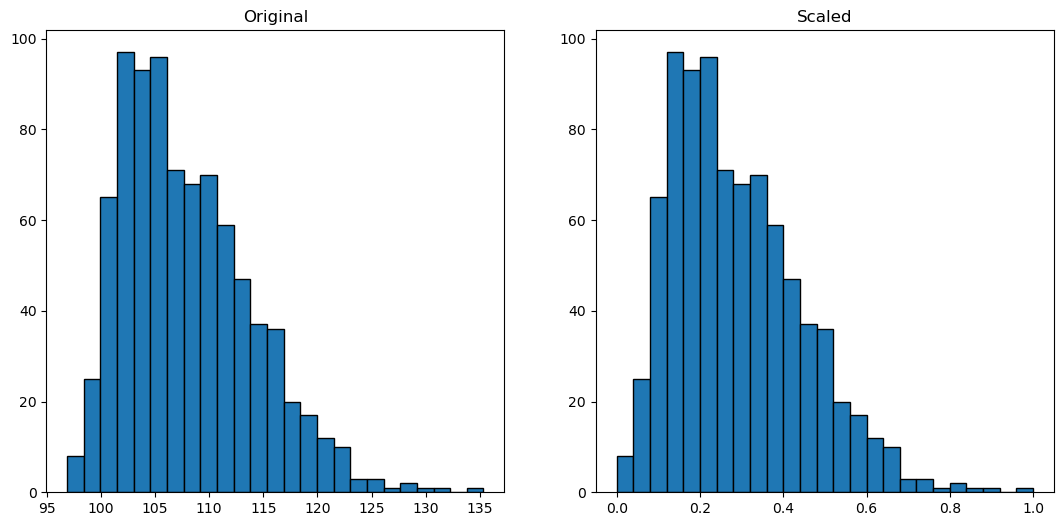

In [7]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

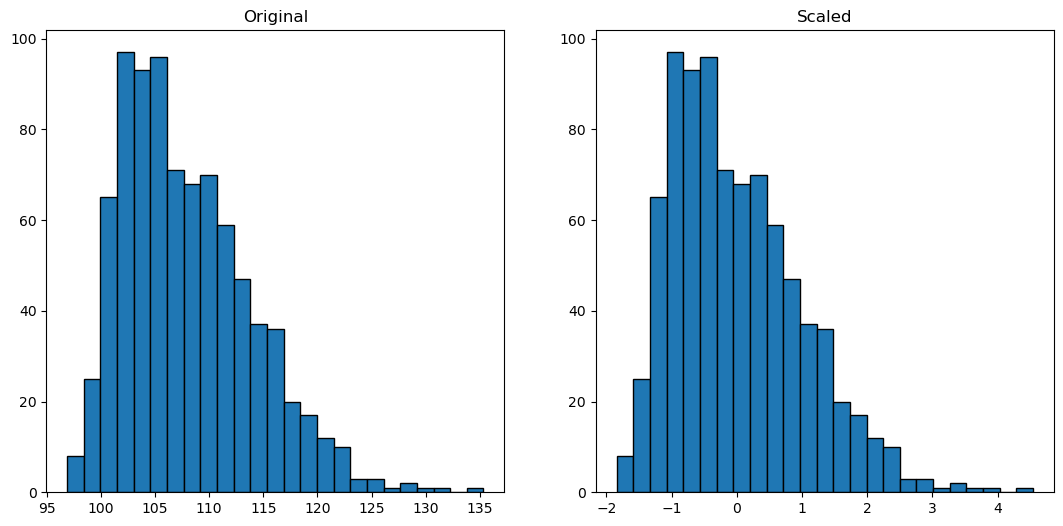

In [8]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

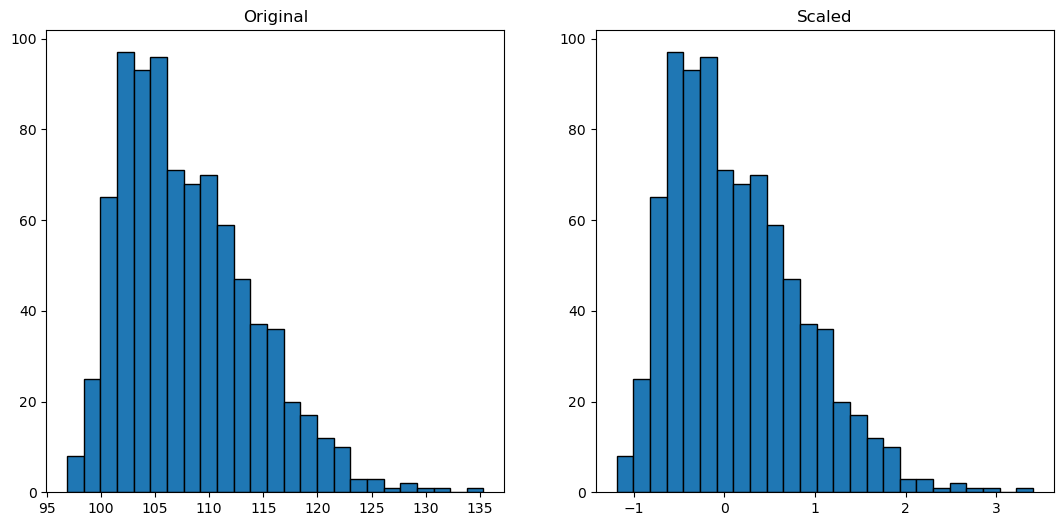

In [9]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

In [3]:
df['tax_rate'] = df['taxamount']/df['taxvaluedollarcnt']

In [4]:
df['tax_rate']

4          0.023417
6          0.012085
7          0.012253
11         0.017192
14         0.036874
             ...   
2152856    0.032854
2152858    0.014046
2152859    0.011648
2152861    0.012496
2152862    0.012204
Name: tax_rate, Length: 2140235, dtype: float64